In [1]:
print("🔹 Task 1: Student Pass/Fail Prediction (Logistic Regression)")


🔹 Task 1: Student Pass/Fail Prediction (Logistic Regression)


Pass/Fail Distribution:
 Pass
1    6607
Name: count, dtype: int64
New Pass/Fail Distribution:
 Pass
1    3725
0    2882
Name: count, dtype: int64

Model Evaluation:
Accuracy: 0.8328290468986385

Confusion Matrix:
 [[445 132]
 [ 89 656]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       577
           1       0.83      0.88      0.86       745

    accuracy                           0.83      1322
   macro avg       0.83      0.83      0.83      1322
weighted avg       0.83      0.83      0.83      1322



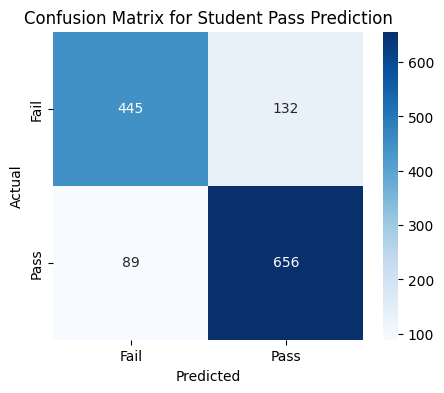

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

# Define Pass/Fail: Default threshold (Exam_Score >= 50)
df["Pass"] = (df["Exam_Score"] >= 50).astype(int)

# Check the distribution of Pass/Fail
print("Pass/Fail Distribution:\n", df["Pass"].value_counts())

# Ensure dataset contains at least two classes
if len(df["Pass"].unique()) < 2:
    print("Warning: Only one class found! Adjusting pass threshold.")
    threshold = df["Exam_Score"].quantile(0.5)  # Median score as threshold
    df["Pass"] = (df["Exam_Score"] >= threshold).astype(int)
    print("New Pass/Fail Distribution:\n", df["Pass"].value_counts())

# Select features and target variable
X = df[["Hours_Studied", "Attendance"]]
y = df["Pass"]

# Stratified train-test split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Student Pass Prediction")
plt.show()


In [3]:
print("🔹 Task 2: Sentiment Analysis with NLP")

🔹 Task 2: Sentiment Analysis with NLP



Model Evaluation:
Accuracy: 0.5
Precision: 1.0
Recall: 0.0
F1-Score: 0.0


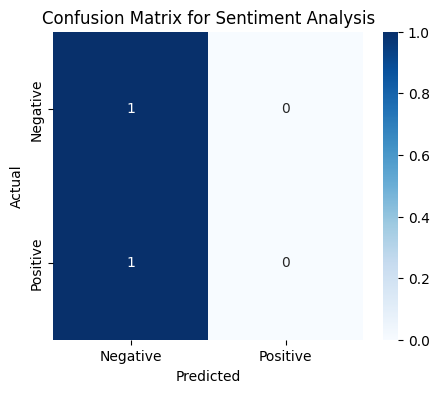

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS  # Built-in stopwords

# Sample dataset (Replace with a real dataset if available)
data = {
    "Review": [
        "I love this product! It works great and exceeded my expectations.",
        "Absolutely terrible. The worst purchase I've ever made.",
        "Not bad, but I expected better quality.",
        "Amazing quality and fast delivery. Highly recommend!",
        "Worst customer service experience ever! I will never buy again.",
        "Decent product for the price, but could be improved.",
        "Excellent! Five stars!",
        "Total waste of money. Do not buy this.",
        "I am very satisfied with this purchase.",
        "Disappointed. This product broke after a week."
    ],
    "Sentiment": ["positive", "negative", "negative", "positive", "negative", "negative", "positive", "negative", "positive", "negative"]
}

# Convert to DataFrame
df_reviews = pd.DataFrame(data)

# Define a basic text preprocessing function
def preprocess_text_simple(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    words = text.split()  # Simple tokenization (split by space)
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]  # Remove stopwords
    return " ".join(words)

# Apply preprocessing
df_reviews["Cleaned_Review"] = df_reviews["Review"].apply(preprocess_text_simple)

# Convert text to numerical format using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_reviews["Cleaned_Review"])
y = df_reviews["Sentiment"].map({"positive": 1, "negative": 0})  # Convert labels to binary

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Evaluation Metrics
print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Display Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Sentiment Analysis")
plt.show()
